In [2]:
import fiona
import geopandas as gpd
import pandas as pd
import numpy as np

In [3]:
azshp = gpd.read_file('shp/usstatesgeojson/arizona.geojson')
df = gpd.read_file('shp/sen2tiles.geojson')

In [8]:
dmafb = pd.read_csv('dm_afb.csv')
(lat, lon) = eval(dmafb.coords[0])

In [4]:
from mgrs import MGRS

In [1]:
import sentinelhub

In [13]:
import requests

In [44]:
from collections import defaultdict

In [61]:
year = defaultdict(set)
tile = defaultdict(list)

In [161]:
def pss(d):
    return set(d['Prefix'].split('/'))

def burst(unit, total):
    return int(*pss(unit) - pss(total))

In [165]:
def tile_years(tile_url='https://roda.sentinel-hub.com/sentinel-s2-l2a/tiles/12/S/WB/'):
    term = requests.get(tile_url).json()
    return tuple({burst(unit, term) for unit in term['CommonPrefixes']})

In [166]:
tile_years()

(2018, 2019)

In [ ]:
find_tile_months

In [158]:
tile_url = 'https://roda.sentinel-hub.com/sentinel-s2-l2a/tiles/12/S/WB/'

'h/t/t/p/s/://///r/o/d/a/./s/e/n/t/i/n/e/l/-/h/u/b/./c/o/m///s/e/n/t/i/n/e/l/-/s/2/-/l/2/a///t/i/l/e/s///1/2///S///W/B//'

In [ ]:
def timesplitter():
    

In [157]:
yrs = requests.get('https://roda.sentinel-hub.com/sentinel-s2-l2a/tiles/12/S/WB/').json()
{burn(year, yrs) for year in yrs['CommonPrefixes']}

{2018, 2019}

In [108]:
year = requests.get('https://roda.sentinel-hub.com/sentinel-s2-l2a/tiles/12/S/WB/2019/').json()

In [147]:
months = {int(*pss(month) - pss(year)) for month in year['CommonPrefixes']}

In [148]:
months

{1, 2}

In [ ]:
'https://roda.sentinel-hub.com/sentinel-s2-l2a/tiles/12/S/WB/'

In [145]:
days = {int(*pss(month) - pss(year)) for month in year['CommonPrefixes']}

In [146]:
days

{1, 2}

In [140]:
int(*set(t.split('/')) - set(year['Prefix'].split('/')))

1

In [120]:
year['Prefix'].split('/')

['tiles', '12', 'S', 'WB', '2019', '']

In [107]:
set('tiles/12/S/WB/2019/1/'.split('/')) - set(jason['Prefix'].split('/')) 

{'1'}

In [69]:
set(jason['Prefix'].split('/')) - set(jason['CommonPrefixes'].split('/'))

{'', '12', '2019', 'S', 'WB', 'tiles'}

In [60]:
requests.get('https://roda.sentinel-hub.com/sentinel-s2-l2a/tiles/12/S/WB/2019/').json()

{'IsTruncated': False,
 'Contents': [],
 'Name': 'sentinel-s2-l2a',
 'Prefix': 'tiles/12/S/WB/2019/',
 'Delimiter': '/',
 'MaxKeys': 1000,
 'CommonPrefixes': [{'Prefix': 'tiles/12/S/WB/2019/1/'},
  {'Prefix': 'tiles/12/S/WB/2019/2/'}],
 'KeyCount': 2}

In [ ]:
def find_dir(baseurl='tiles/12/S/WB/', otherurl='tiles/12/S/WB/2018/'):
    print
    

In [39]:
a = requests.get('https://roda.sentinel-hub.com/sentinel-s2-l2a/tiles/12/S/WB/')
for i in a.json()['CommonPrefixes']:
    dirs = i.get('Prefix').strip().split('/')[-2]
    requests.get('https://roda.sentinel-hub.com/sentinel-s2-l2a/tiles/12/S/WB/2018/')

In [10]:
import utm
utm.from_latlon(lat, lon)

(510426.4012117877, 3606672.6396077485, 12, 'S')

In [32]:
baseurl='tiles/12/S/WB/'
otherurl='tiles/12/S/WB/2018/'

In [33]:
baseurl - otherurl

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [11]:
def get_mgrs(lat, lon):
    m = MGRS()
    c = m.toMGRS(lat, lon).decode('UTF-8')
    zone, band, square = c[:2], c[2:3], c[3:5]
    return (zone, band, square)

In [12]:
get_mgrs(lat, lon)

('12', 'S', 'WB')

In [13]:
's3://sentinel-s2-l2a/tiles/{utm}/{band}/{grid}/2018/12/31/0/'.format(utm=utm, band=band, grid=grid)

's3://sentinel-s2-l2a/tiles/12/S/WB/2018/12/31/0/'

In [ ]:
def build_s2aws_query(utm, band, grid, is_L2A=True):
    if is_L2A:
        's3://sentinel-s2-l2a/tiles/{utm}/{band}/{grid}/2018/12/31/0/'.format(utm=utm, band=band, grid=grid)

In [93]:
utm, band, grid

('06', 'C', 'WE')

In [39]:
eval(df.coords[0])
lat, lon = eval(df.coords[0])

In [37]:
lat

32.5975

In [23]:
import m

ModuleNotFoundError: No module named 'mgrspy'

In [3]:
project((32.5975, 110.8888))

NameError: name 'project' is not defined

In [141]:
if x < -108 and x > -114:
    utmband = 11
elif x < -114 and x > -120:
    utmband = 12

In [113]:
%%time
df = gpd.read_file('sen2tiles.geojson', bbox=az.geometry[0].bounds)

CPU times: user 2.11 s, sys: 21.5 ms, total: 2.13 s
Wall time: 2.12 s


In [114]:
%%time
df = gpd.read_file('sen2tiles.geojson', bbox=az)

CPU times: user 2.07 s, sys: 19.7 ms, total: 2.09 s
Wall time: 2.08 s


In [115]:
df.to_file('az_sen2tiles.geojson', driver='GeoJSON')

/Users/tjs/anaconda3/envs/geo-env/lib/python3.7/site-packages/geopandas/io/file.py:108: FionaDeprecationWarning: Use fiona.Env() instead.
  with fiona.drivers():


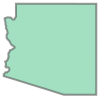

In [107]:
az.geometry[0]

In [103]:
from shapely.geometry import Polygon, box
tuple(az.total_bounds)

(-114.813613, 31.332502, -109.045223, 37.003875)

In [66]:
spatix = df.sindex
possible_matches_idx = list(spatix.intersection(tuple(az.total_bounds)))
possible_matches = gdf.iloc[possible_matches_idx]
precise_matches = possible_matches[possible_matches.intersects(az.geometry[0])]

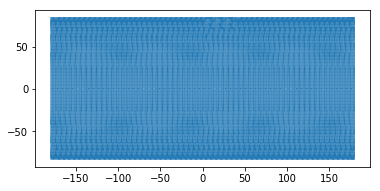

In [64]:
df.plot()

In [28]:
gdf = gpd.read_file('s2tiles.geojson')

In [32]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 56686 entries, 0 to 56685
Data columns (total 9 columns):
name           56686 non-null object
folders        56686 non-null object
description    56686 non-null object
altitude       56686 non-null float64
alt_mode       56686 non-null object
time_begin     56686 non-null object
time_end       56686 non-null object
time_when      56686 non-null object
geometry       56686 non-null object
dtypes: float64(1), object(8)
memory usage: 3.9+ MB


In [33]:
gdf.size

510174

In [34]:
gdf.head()

,name,folders,description,altitude,alt_mode,time_begin,time_end,time_when,geometry
0,01CCV,Features,TILE PROPERTIES<br><table border=0 cellpadding...,0.0,,,,,"(POLYGON Z ((180 -73.0597374076 0, 176.8646237..."
1,01CDH,Features,TILE PROPERTIES<br><table border=0 cellpadding...,0.0,,,,,"(POLYGON Z ((180 -83.8085458364 0, 174.7128815..."
2,01CDJ,Features,TILE PROPERTIES<br><table border=0 cellpadding...,0.0,,,,,"(POLYGON Z ((180 -82.9134390552 0, 175.7481867..."
3,01CDK,Features,TILE PROPERTIES<br><table border=0 cellpadding...,0.0,,,,,"(POLYGON Z ((180 -82.01865591009999 0, 176.552..."
4,01CDL,Features,TILE PROPERTIES<br><table border=0 cellpadding...,0.0,,,,,"(POLYGON Z ((180 -81.1231740281 0, 177.1961580..."


In [49]:
droplist = []
for col in gdf.columns[:-1]:
    if gdf[col].nunique() == 1:
        droplist.append(col)
gdf.drop(columns=droplist, inplace=True)

In [50]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 56686 entries, 0 to 56685
Data columns (total 3 columns):
name           56686 non-null object
description    56686 non-null object
geometry       56686 non-null object
dtypes: object(3)
memory usage: 1.3+ MB


In [52]:
gdf.size

170058

In [53]:
gdf.drop(columns=['description'], inplace=True)

In [54]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 56686 entries, 0 to 56685
Data columns (total 2 columns):
name        56686 non-null object
geometry    56686 non-null object
dtypes: object(2)
memory usage: 885.8+ KB


In [56]:
gdf.size

113372

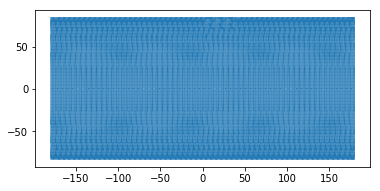

In [57]:
%matplotlib inline
gdf.plot()

In [58]:
gdf.to_file('sen2tiles.geojson', driver='GeoJSON')

/Users/tjs/anaconda3/envs/geo-env/lib/python3.7/site-packages/geopandas/io/file.py:108: FionaDeprecationWarning: Use fiona.Env() instead.
  with fiona.drivers():


In [26]:
gdf['altitude'] = gdf.altitude.replace(0.0, np.nan)

In [60]:
gdf.size

113372

In [59]:
df = gpd.read_file('sen2tiles.geojson')

In [61]:
df.size

113372

In [12]:
with fiona.open(filepath) as src:
    meta = src.meta

DriverError: ~/dsi/projects/remote-sensing-roundtable/S2A_OPER_GIP_TILPAR_MPC__20151209T095117_V20150622T000000_21000101T000000_B00.kml: No such file or directory

In [6]:
%matplotlib inline


,Name,description,timestamp,begin,end,altitudeMode,tessellate,extrude,visibility,drawOrder,icon,snippet,geometry
56681,60XWM,TILE PROPERTIES<br><table border=0 cellpadding...,None,None,None,None,-1,0,-1,None,None,,()
56682,60XWN,TILE PROPERTIES<br><table border=0 cellpadding...,None,None,None,None,-1,0,-1,None,None,,()
56683,60XWP,TILE PROPERTIES<br><table border=0 cellpadding...,None,None,None,None,-1,0,-1,None,None,,()
56684,60XWQ,TILE PROPERTIES<br><table border=0 cellpadding...,None,None,None,None,-1,0,-1,None,None,,()
56685,60XWR,TILE PROPERTIES<br><table border=0 cellpadding...,None,None,None,None,-1,0,-1,None,None,,()
